In [202]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters
from tsfresh.feature_extraction import ComprehensiveFCParameters
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from tsfresh.feature_extraction.feature_calculators import absolute_maximum
from math import floor

In [179]:
file_name = "train.h5"
f1 = h5py.File(file_name, 'r+')

In [180]:
print(len(f1['x'][1][0]))

18530


In [212]:
custom_fc_parameters = {
    
        'absolute_maximum': None,

}

temp_y = []
tf = None
for i in range(len(f1['y'])):
    temp_y.append(f1['y'][i])
Y = np.array(temp_y)
size = 18000    
increment = 1200
index = 0
features = len(custom_fc_parameters)
numpy_matrix_result = np.zeros(shape = (features, len(f1['x']), int(size/increment)))

for index, j in enumerate(np.arange(0,size,increment)):
    temp_x = []
    for i in range(len(f1['x'])):
        temp_x.append(f1['x'][i][0][j:j+increment])
    df = pd.DataFrame()
    for i, ts in enumerate(temp_x):
        data = [[x, i] for x in ts]
        df = df.append(data, ignore_index=True)
    df.columns = ['value', 'id']
    tf = extract_features(df, column_id='id', column_value='value', default_fc_parameters=custom_fc_parameters)
    for i, k in enumerate(tf.keys()):
        numpy_matrix_result[i][:,index] = tf[k].to_numpy()

C:\Users\user\AppData\Local\Temp\ipykernel_21960\4131457596.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
Feature Extraction: 100%|██████████| 41/41 [00:02<00:00, 16.93it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_21960\4131457596.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
Feature Extraction: 100%|██████████| 41/41 [00:02<00:00, 16.76it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_21960\4131457596.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
Feature Extraction: 100%|██████████| 41/41 [00:02<00:00, 17.31it/s]
C:\Users\user\AppData\Local\Temp\ipykernel_21960\4131457596.py:25: Fut

In [213]:
X = numpy_matrix_result[0]
for i in range(len(tf.keys())-1):
    X = np.concatenate((X, numpy_matrix_result[i+1]), axis=1)

In [206]:
X = X[:,~np.any(np.isnan(X), axis=0)]
X = X[:,~np.all(X == 0, axis=0)]
print(X.shape)


(204, 15)


In [249]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.33, random_state=99)
machine = sklearn.svm.SVC()
machine.fit(X_train, Y_train)

SVC()

136 15
136
[0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0]
Alcoholicos Identificados: 0.3888888888888889
No Alcoholicos Identificados: 0.94
0.6851851851851851


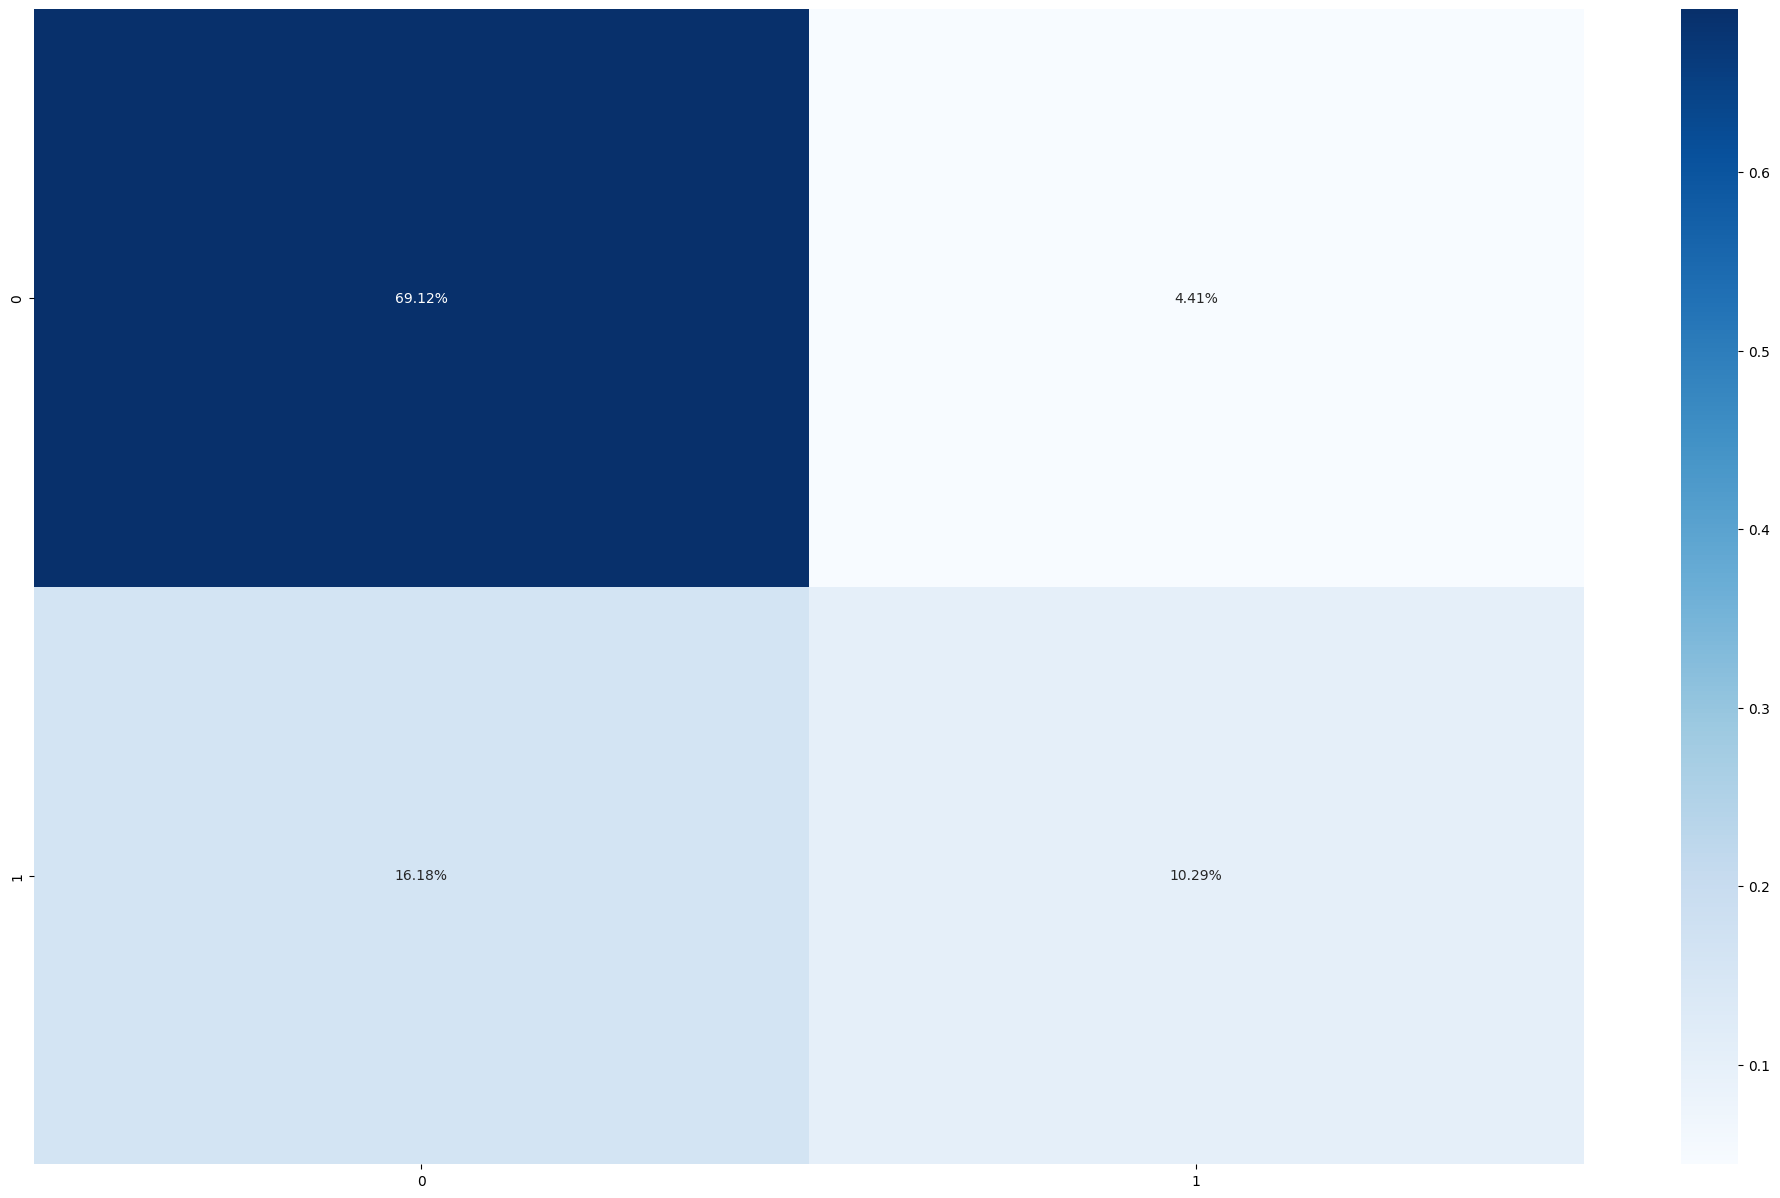

In [250]:
print(len(X_train), len(X_train[0]))
print(len(Y_train))
y_pred = machine.predict(X_test)
cf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(25, 15))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

print(y_pred)
print(Y_test)

unos_aggarados = 0
unos_totales = 0
for i in range(len(y_pred)):
    if (Y_test[i] == 1):
        unos_totales += 1
        if (Y_test[i] == y_pred[i]):
            unos_aggarados += 1 

zeros_agarrados = 0
zeros_totales = 0
for i in range(len(y_pred)):
    if (Y_test[i] == 0):
        zeros_totales += 1
        if (Y_test[i] == y_pred[i]):
            zeros_agarrados += 1 
print("Alcoholicos Identificados: " + str(unos_aggarados/unos_totales))
print("No Alcoholicos Identificados: " + str(zeros_agarrados/zeros_totales))
print(sklearn.metrics.f1_score(Y_test, y_pred, average='macro'))